The following is setup code to draw the DFT glyphs. The strategy is to construct matplotlib patches and then use them as tiles for each piece of the DFT in 3D. Start notebook with the ` --pylab` flag to all the matplotlib and numpy material loaded.

In [ ]:
def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a,b=x
    a0= a*array([1,1,0])
    b0= b*array([1,1,0])
    ve = vstack([a,a0,b0,b])      # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha)         # set transparency
    poly.set_color(color)         
    return poly

def drawDFTView(X,ax=None,fig=None):
    'Draws 3D diagram given DFT matrix'
    a=2*pi/len(X)*arange(len(X))
    d=vstack([cos(a),sin(a),array(abs(X)).flatten()]).T
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6,6)
        
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        
    ax.axis([-1,1,-1,1])          # x-y limits
    ax.set_zlim([0,d[:,2].max()]) # z-limit
    ax.set_aspect(1)              # aspect ratio
    ax.view_init(azim=-30)        # camera view position
    a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
    ax.add_patch(a)
    b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a) # format 2D patch for 3D plot
    art3d.patch_2d_to_3d(b)
    ax.axis('off')

    sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
    for s in sl:
      poly=facet_filled(d[s,:])
      ax.add_collection3d(poly)
     
    # edge polygons    
    ax.add_collection3d(facet_filled(d[[-1,0],:]))
    ax.add_collection3d(facet_filled(d[[-2,-1],:]))

def drawInOut(X,v,return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8,8)
    gs = gridspec.GridSpec(8,6)
        
    ax1 = plt.subplot(gs[3:5,:2])
    ax2 = plt.subplot(gs[:,2:],projection='3d')
    
    ax1.stem(arange(len(v)),v)
    ymin,ymax= ax1.get_ylim()
    ax1.set_ylim(ymax = ymax*1.2, ymin = ymin*1.2)
    ax1.set_title('Signal')
    ax1.set_xlabel('n')
    ax1.tick_params(labelsize=8)
    
    drawDFTView(X,ax2)
    if return_axes:
        return ax1,ax2

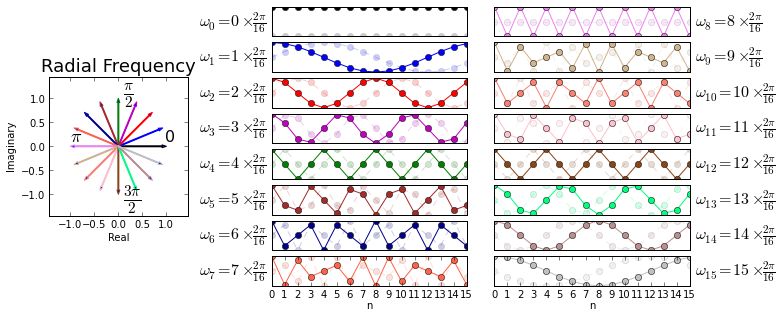

In [2]:
# must start notebook with --pylab flag

from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/sqrt(Nfft)

Nfft=16
v = ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)
# --- 
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8,12)
gs.update(wspace=1, left=0.01)

fig =figure(figsize=(10,5))
ax0 = subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a=2*pi/Nfft*arange(Nfft)

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan','Salmon','Pink',
          'SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]

for j,i in enumerate(a):
  ax0.add_patch(FancyArrow(0,0,cos(i),sin(i),width=0.02,
                            length_includes_head=True,edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency',fontsize=18)
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the middle column
for i in range(8):
  ax=subplot(gs[i,4:8])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i],'-o',color=colors[i])
  ax.plot(U.imag[:,i],'--o',color=colors[i],alpha=0.2)
  #ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
ax.set_xticks(arange(16))
ax.set_xlabel('n')

# plots in the far right column
for i in range(8):
  ax=subplot(gs[i,8:])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
  ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
  #ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
  ax.yaxis.set_label_position('right')
ax.set_xticks(arange(16))
ax.set_xlabel('n')

Figure shows the discrete frequencies on the unit circle and their corresponding real and imaginary parts that are the columns of $\mathbf{U}$.  The pinwheel on the left shows each discrete frequency on the unit circle corresponding to each of the columns of the $\mathbf{U}$ matrix  shown on the right. These are color coded corresponding to the graphs on the right. For example, the $k=1$ column of the $\mathbf{U}$ matrix (i.e. $ \mathbf{u}_1 $) corresponds to discrete frequency $\omega_1=\frac{2\pi}{16}$ marked on the y-axis label which is shown in the second row down the middle column in the figure. The real part of $ \mathbf{u}_1 $ is plotted in bold and the corresponding imaginary part is muted in the background because it is just an out-of-phase version of the real part. These real/imaginary parts shown in the graphs correspond to the conjugacy relationships on the leftmost radial plot. For example, $\omega_1$ and $\omega_{15}$ are complex conjugates and their corresponding imaginary parts are inverted as shown in the plots on the right.  Figure is the most important graphic in this entire book so please make sure to review it carefully.

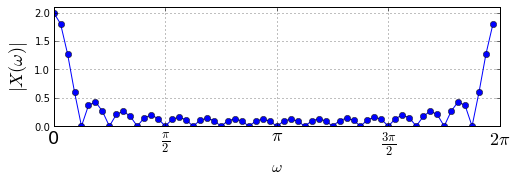

In [3]:
U = dftmatrix(64,16) 
x = ones((16,1)) 
X = U.H*x

fig,ax=subplots()
fig.set_size_inches((8,4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(arange(0,64)*2*pi/64.,abs(X),'o-')
ax.set_ylabel(r'$|X(\omega)|$',fontsize=18)
ax.set_xticks([0, pi/2., pi, 3*pi/2,2*pi])
ax.set_xlabel(r'$\omega$',fontsize=16)
ax.axis([0, 2*pi,0,2.1])
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$', r'$2\pi$'],
                   fontsize=18);

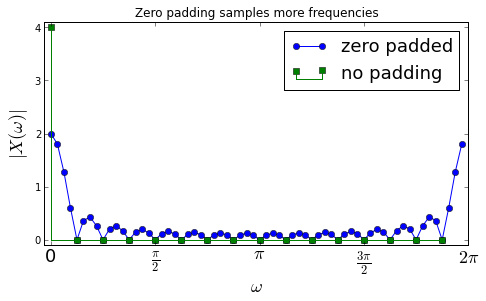

In [4]:
U = dftmatrix(64,16)
x = ones((16,1))
X = U.H*x

fig,ax=subplots()
fig.set_size_inches((8,4))

ax.set_aspect(0.8) # aspect ratio
ax.plot(arange(0,64)*2*pi/64.,abs(X),'o-',label='zero padded')
ax.stem(arange(0,16)*2*pi/16.,abs(dftmatrix(16).H*x),
        markerfmt='gs', basefmt='g-',linefmt='g-',
        label='no padding')
ax.set_xlabel(r'$\omega$',fontsize=18)
ax.set_ylabel(r'$|X(\omega)|$',fontsize=18)
ax.set_xticks([0, pi/2., pi, 3*pi/2,2*pi])
ax.axis([-.1, 2*pi,-.1,4.1])
ax.legend(loc=0,fontsize=18)
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$', r'$2\pi$'],
                   fontsize=18);
ax.set_title('Zero padding samples more frequencies');

As shown in figure, without zero-padding, $\mathbf{x}$ is the $ 0^{th} $ column of the 16-point DFT matrix and so all the coefficients except for the $0^{th}$ column are zero due to orthonormality (shown by the green squares).  But, the zero-padded 64-element-long $\mathbf{x}$ vector is definitely not a column of the 64-point DFT matrix so we would not expect all the other terms to be zero. In fact, the other terms account for the 63 other discrete frequencies that are plotted in the figure.


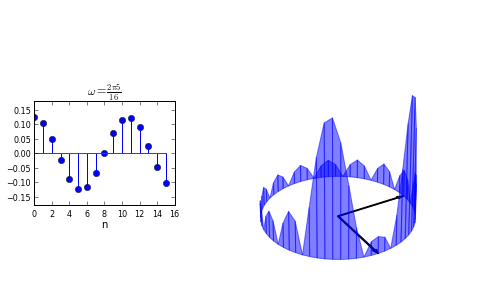

In [5]:
v = U[:,6].real
ax1,ax2=drawInOut(U.H*v,v,return_axes=1) 
ax1.set_title(r'$\omega=\frac{2\pi 5}{16}$')

Figure shows the symmetric lobes of the DFT of a real signal. The plot on the left is the signal in the sampled time-domain and the plot on the right is its DFT-magnitude glyph.  Because the input signal is real, the DFT is symmetric.  Recall that every $\mathbf{u}_i$ had its complex conjugate, $\mathbf{u}_{N-i}$, and since the real parts of complex conjugates are the same and there is no imaginary part in the real-valued input signal, the resulting corresponding inner products are complex conjugates and thus have the same magnitudes.   This fact has extremely important computational consequences for the fast implemention of the DFT (i.e. FFT), but that is a story for another day.  For now, it's enough to recognize the symmetry of the DFT of real signals and how it arises. 

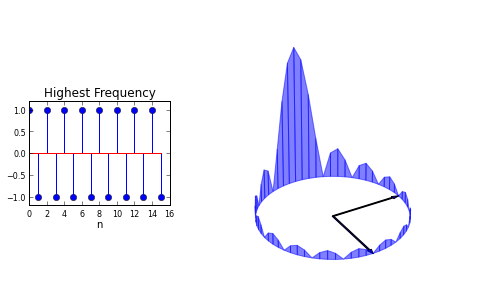

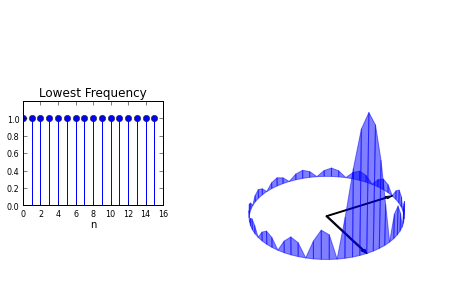

In [6]:
v = matrix(cos(pi*arange(0,16))).T
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title('Highest Frequency')
v = ones((16,1))
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title('Lowest Frequency')

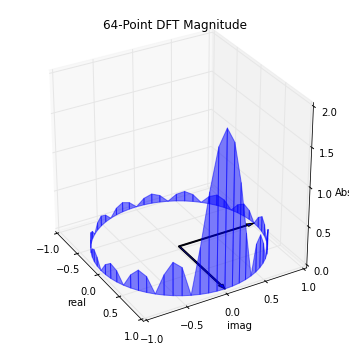

In [7]:
a=2*pi/64.*arange(64)
d=vstack([cos(a),sin(a),array(abs(X)).flatten()]).T

fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-1,1,-1,1])
ax.set_zlim([0,d[:,2].max()])
ax.set_aspect(1)
ax.view_init(azim=-30)

ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('Abs')
ax.set_title('64-Point DFT Magnitude')

sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
for s in sl:
  poly=facet_filled(d[s,:])
  ax.add_collection3d(poly)
 
# edge polygons    
ax.add_collection3d(facet_filled(d[[-1,0],:]))
ax.add_collection3d(facet_filled(d[[-2,-1],:]))

# add 0 and pi/2 arrows for reference
a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
ax.add_patch(a)
b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
ax.add_patch(b)
art3d.patch_2d_to_3d(a)
art3d.patch_2d_to_3d(b)
plt.show()